In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv(r"C:\Users\HP\Downloads\bank-full.csv",sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA


In [5]:
data.shape

(45211, 17)

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
data.mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_4332\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [9]:
data.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_4332\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [10]:
data.var()

C:\Users\HP\AppData\Local\Temp\ipykernel_4332\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [11]:
data.std()

C:\Users\HP\AppData\Local\Temp\ipykernel_4332\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [12]:
data.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_4332\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [13]:
data.kurt()

C:\Users\HP\AppData\Local\Temp\ipykernel_4332\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [14]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
data1 = data.drop(['day','month','duration'], axis=1)

In [18]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,no


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
data1.shape

(45211, 14)

# Univariate Analysis


<AxesSubplot:xlabel='y', ylabel='count'>

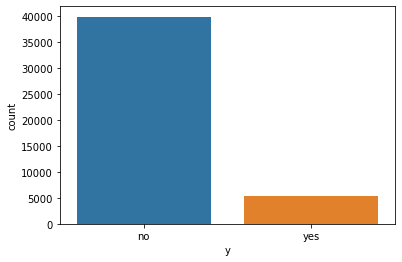

In [21]:
sns.countplot(x="y",data=data)

From above countplot, we can understand that nearly 40000 customers have not subscribed to the term deposite but only about 5000 have.
The data is not balanced since number of customers of negative (no) category is much more than positive (Yes) category.


<AxesSubplot:xlabel='job', ylabel='count'>

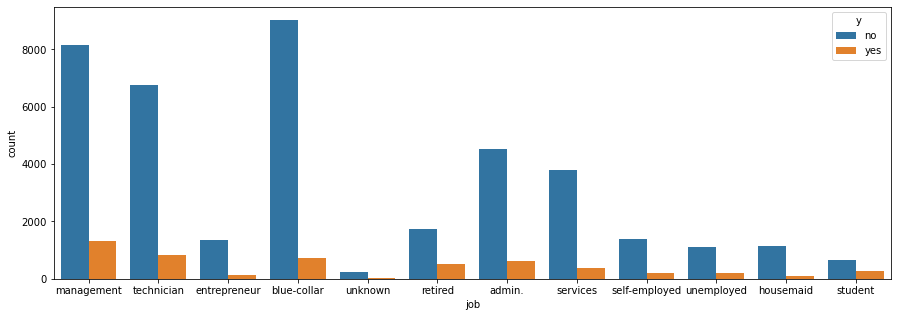

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x="job",data=data,hue = 'y')

From this plot, we can conclude that 'Management', 'Technician' and 'Blue-Collar' are top three job profiles who have highest number of customer who have subscribed to term deposit as well as the customers who have not subscribed to term deposit.

'unknown' job profile has the lowest number of customers subscribed to term deposit as well who have not not subscribed.

The rate of not subscribing is lowest in job profiles as 'entrepreneur', 'self-employed', 'unemployed', 'housemaid' and 'student'



<AxesSubplot:xlabel='y', ylabel='age'>

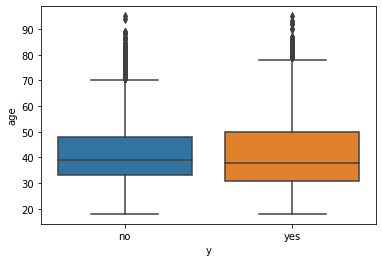

In [23]:
sns.boxplot(data=data,x='y',y='age')

From this boxplot, we conclude that the customers who have subscribed and not-subscribed has median-age around 40. Also both boxplot overlaps each other so we can't determine whether the customer will subscribe to term deposit or not by his/her age.


<AxesSubplot:xlabel='education', ylabel='count'>

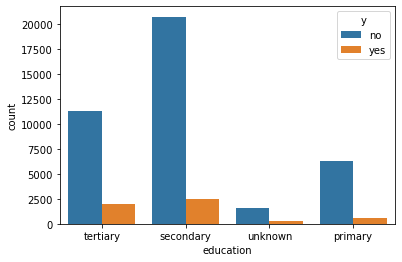

In [24]:
sns.countplot(x="education",data=data,hue = 'y')

Majority of customers having 'secondary' or 'tertiary' education subscribed to term deposit.


<AxesSubplot:xlabel='default', ylabel='count'>

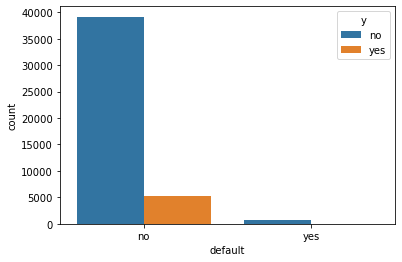

In [25]:
sns.countplot(x="default",data=data,hue = 'y')

Majority of the customers doesn't have default credits.

<AxesSubplot:xlabel='housing', ylabel='count'>

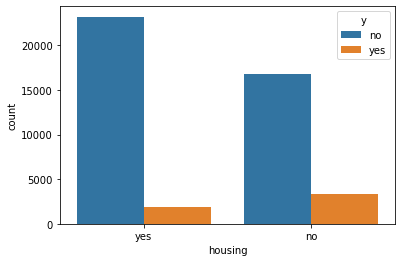

In [26]:
sns.countplot(x="housing",data=data,hue = 'y')

As we can see, the number of customers subscribed to term deposit who has housing is less than that that of customers not having housing.

<AxesSubplot:xlabel='loan', ylabel='count'>

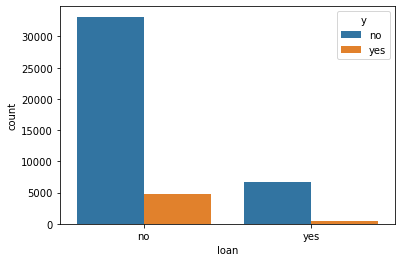

In [27]:
sns.countplot(x="loan",data=data,hue = 'y')

Very few customers who are having personal loan subscribed to term deposit.


<AxesSubplot:xlabel='contact', ylabel='count'>

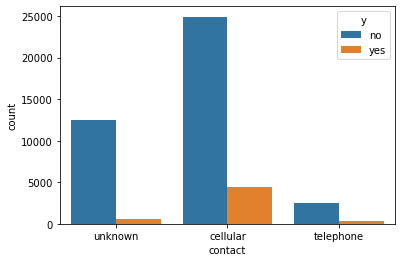

In [28]:
sns.countplot(x="contact",data=data,hue = 'y')

Cellular contact was the most used communication mode used to contact the customers.


<AxesSubplot:xlabel='poutcome', ylabel='count'>

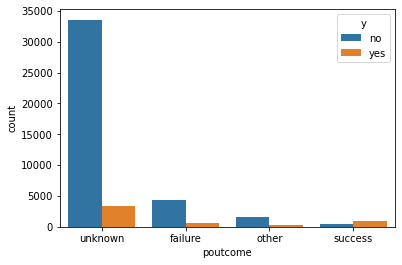

In [31]:
sns.countplot(x="poutcome",data=data,hue = 'y')

Above countplot shows the outcome of the previous marketing campaign.

We can say most of the customers are new i.e. they are not contacted previously and hence their marketing campaign is 'unknown.

Very few people subscribed to term deposit in 'Failure' marketing campaign, where as the rate of customers who subscribed was more than the customers who didn't subscribed during 'Successful' marketing campaign.



array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

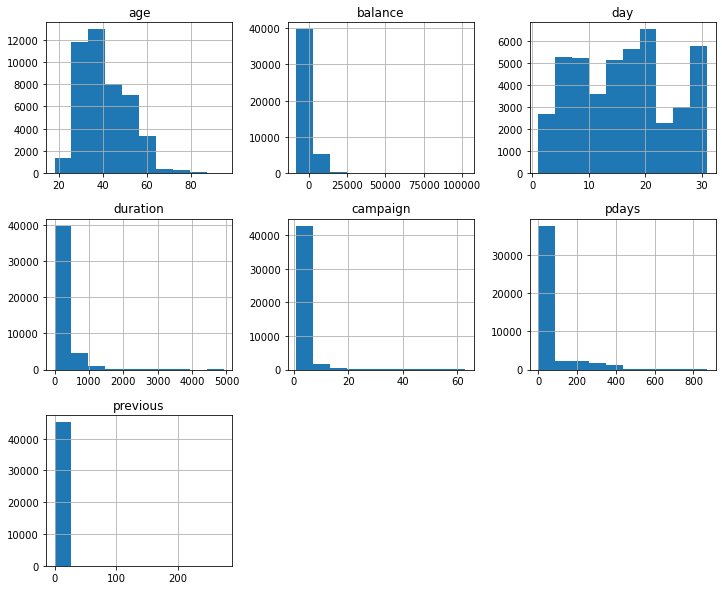

In [30]:
data.hist(figsize=(12,10))

# Data Preprocessing

In [32]:
data[['job','marital','education','default','housing','loan','contact','poutcome','month',
       'y']] = data[['job','marital','education','default','housing','loan','contact','poutcome','month', 'y']].astype('category')
data1 = data

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [34]:
#Label Encoding

data1['month'] = data1['month'].cat.codes
data1['job'] = data1['job'].cat.codes
data1['marital'] = data1['marital'].cat.codes
data1['education'] = data1['education'].cat.codes
data1['default'] = data1['default'].cat.codes
data1['housing'] = data1['housing'].cat.codes
data1['loan'] = data1['loan'].cat.codes
data1['contact'] = data1['contact'].cat.codes
data1['poutcome'] = data1['poutcome'].cat.codes
data1['y'] = data1['y'].cat.codes

In [35]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,16]

x


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [36]:
x1 = x.clip(lower=0)      # Replacing all negative values of x with 0

# Feature selection


Correlation Matrix and Heatmap


In [37]:
corrmat = data1.corr()
corrmat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [38]:
top_corr_features = corrmat.index

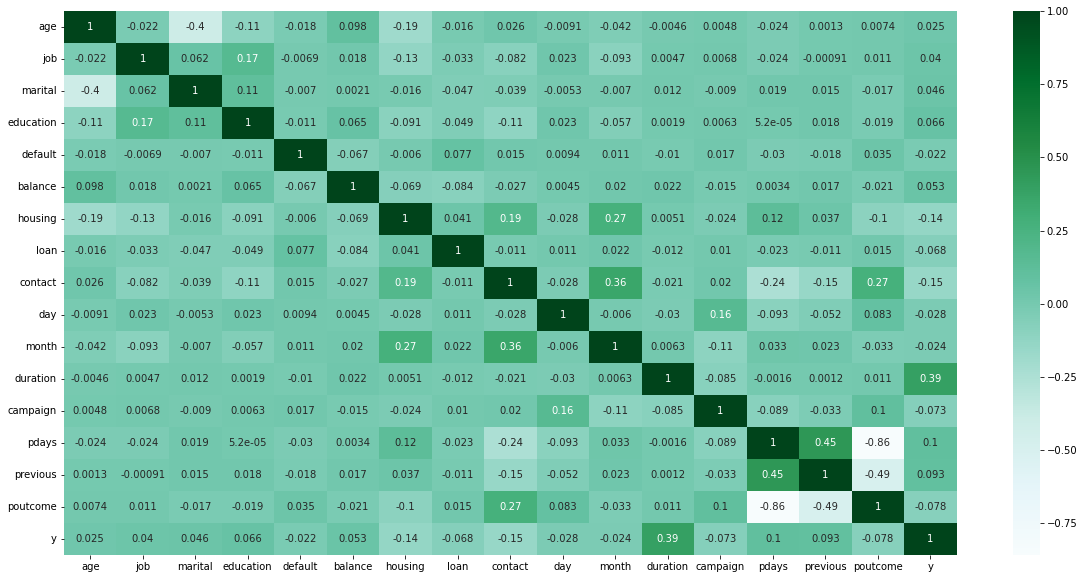

In [39]:
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="BuGn")

# Univariant Selection using SelectKBest


In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(x1,y)


In [42]:
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(x1.columns)


In [43]:
#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [44]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features


       Specs         Score
11  duration  1.807711e+06
5    balance  7.884598e+05
13     pdays  1.171871e+05
14  previous  3.593220e+03
8    contact  1.253814e+03
12  campaign  8.405821e+02
6    housing  3.889497e+02
1        job  1.824523e+02
7       loan  1.765161e+02
9        day  1.592004e+02


In [45]:
data_x = x1[['duration', 'balance', 'pdays', 'previous', 'contact', 'campaign', 'housing', 'job', 'loan', 'day']]
data_x.head(5)

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
0,261,2143,0,0,2,1,1,4,0,5
1,151,29,0,0,2,1,1,9,0,5
2,76,2,0,0,2,1,1,2,1,5
3,92,1506,0,0,2,1,1,1,0,5
4,198,1,0,0,2,1,0,11,0,5


In [46]:
data_x.describe()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,258.163080,1388.734069,41.015195,0.580323,0.640242,2.763841,0.555838,4.339762,0.160226,15.806419
std,257.527812,3029.530442,99.792615,2.303441,0.897951,3.098021,0.496878,3.272657,0.366820,8.322476
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,103.000000,72.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
50%,180.000000,448.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,16.000000
75%,319.000000,1428.000000,0.000000,0.000000,2.000000,3.000000,1.000000,7.000000,0.000000,21.000000
max,4918.000000,102127.000000,871.000000,275.000000,2.000000,63.000000,1.000000,11.000000,1.000000,31.000000


In [47]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

In [48]:
data_x.corr()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
duration,1.000000,0.021325,-0.001584,0.001203,-0.020839,-0.084570,0.005075,0.004744,-0.012412,-0.030206
balance,0.021325,1.000000,0.002627,0.016018,-0.025614,-0.014164,-0.065279,0.017850,-0.079532,0.005788
pdays,-0.001584,0.002627,1.000000,0.454288,-0.244526,-0.088508,0.124350,-0.024531,-0.022709,-0.093024
previous,0.001203,0.016018,0.454288,1.000000,-0.147811,-0.032855,0.037076,-0.000911,-0.011043,-0.051710
contact,-0.020839,-0.025614,-0.244526,-0.147811,1.000000,0.019614,0.188123,-0.082063,-0.010873,-0.027936
campaign,-0.084570,-0.014164,-0.088508,-0.032855,0.019614,1.000000,-0.023599,0.006839,0.009980,0.162490
housing,0.005075,-0.065279,0.124350,0.037076,0.188123,-0.023599,1.000000,-0.125363,0.041323,-0.027982
job,0.004744,0.017850,-0.024531,-0.000911,-0.082063,0.006839,-0.125363,1.000000,-0.033004,0.022856
loan,-0.012412,-0.079532,-0.022709,-0.011043,-0.010873,0.009980,0.041323,-0.033004,1.000000,0.011370
day,-0.030206,0.005788,-0.093024,-0.051710,-0.027936,0.162490,-0.027982,0.022856,0.011370,1.000000


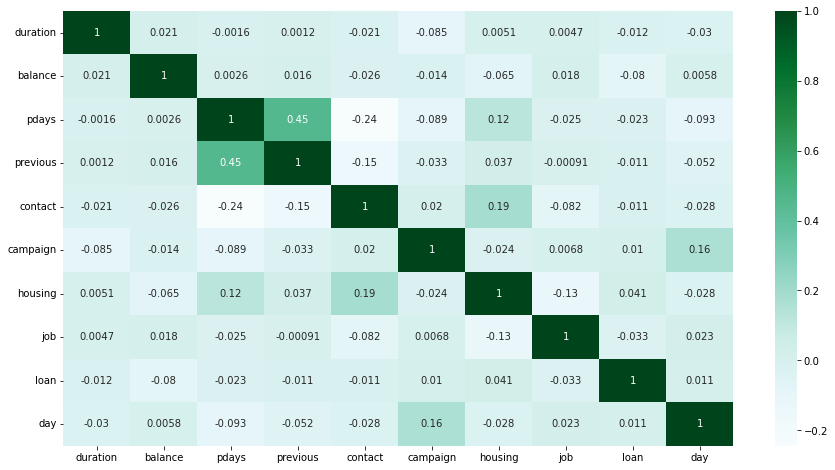

In [49]:
plt.figure(figsize=(15,8))
g1 = sns.heatmap(data_x.corr(), annot=True, cmap= 'BuGn')

Above heatmap shows the correlation between the significant features.

We can say that there's a bit relatively strong relation between features 'previous' and 'pdays' as compared to other features.

Also the relation between features 'contact' and 'pdays' is the weakest among all.


# Model Building


In [50]:
classifier1 = sm.Logit(y, data_x).fit()

Optimization terminated successfully.
         Current function value: 0.292027
         Iterations 8


In [51]:
classifier1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45201
Method:                           MLE   Df Model:                            9
Date:                Wed, 07 Dec 2022   Pseudo R-squ.:                  0.1908
Time:                        23:32:50   Log-Likelihood:                -13203.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0033   5.71e-05     57.265      0.000       0.003       0.003
balance     -1.06e-05   4.92e-06     -2.154      0.031   -2.03e-05   -9.55e-07
pdays          0.0007      0.000      4.418      0.000       0.000       0.001
previous       0.0633      0.008      7.973      0.000       0.048       0.079
contact       -0.7889      0.025    -32.092      0.000      -0.837      -0.741
campaign      -0.3301      0.011    -28.950      0.000      -0.352      -0.308
housing       -1.4508      0.034    -42.724      0.000      -1.517      -1.384
job           -0.0937      0.005    -20.621      0.000      -0.103      -0.085
loan          -1.0626      0.055    -19.331      0.000      -1.170      -0.955
day           -0.0517      0.002    -30.179      0.000      -0.055      -0.048
==============================================================================
"""

In [52]:
classifier1.params

duration    0.003271
balance    -0.000011
pdays       0.000733
previous    0.063267
contact    -0.788923
campaign   -0.330111
housing    -1.450791
job        -0.093711
loan       -1.062574
day        -0.051714
dtype: float64

In [53]:
y_pred1 = classifier1.predict(data_x)
y_pred1.head(4)

0    0.040651
1    0.018576
2    0.009769
3    0.031490
dtype: float64

In [54]:
y_pred1 = list(map(round, y_pred1))
y_pred1 = pd.DataFrame(y_pred1)

In [55]:
prediction1 = pd.concat([y,y_pred1], axis = 1)
prediction1.head(5)

,y,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [56]:
prediction1.tail(5)

,y,0
45206,1,1
45207,1,0
45208,1,1
45209,0,0
45210,0,1


In [57]:
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(data_x)
scaled_x = scalar.transform(data_x)

In [58]:
scaled_x

array([[5.30703538e-02, 2.09836772e-02, 0.00000000e+00, ...,
        3.63636364e-01, 0.00000000e+00, 1.33333333e-01],
       [3.07035380e-02, 2.83960167e-04, 0.00000000e+00, ...,
        8.18181818e-01, 0.00000000e+00, 1.33333333e-01],
       [1.54534364e-02, 1.95834598e-05, 0.00000000e+00, ...,
        1.81818182e-01, 1.00000000e+00, 1.33333333e-01],
       ...,
       [2.29158194e-01, 5.59597364e-02, 2.11251435e-01, ...,
        4.54545455e-01, 0.00000000e+00, 5.33333333e-01],
       [1.03294022e-01, 6.54087558e-03, 0.00000000e+00, ...,
        9.09090909e-02, 0.00000000e+00, 5.33333333e-01],
       [7.34038227e-02, 2.90912295e-02, 2.15843858e-01, ...,
        1.81818182e-01, 0.00000000e+00, 5.33333333e-01]])

In [59]:
classifier2 = LogisticRegression()
classifier2.fit(scaled_x,y)

LogisticRegression()

In [60]:
classifier2.coef_

array([[17.72273709,  2.00537386,  2.32192876,  3.68882538, -1.16168868,
        -6.09988223, -1.03019879,  0.1610244 , -0.7190179 , -0.16780812]])

In [61]:
proba = classifier2.predict_proba(scaled_x)
proba

array([[0.97326394, 0.02673606],
       [0.98128176, 0.01871824],
       [0.99364193, 0.00635807],
       ...,
       [0.13320987, 0.86679013],
       [0.82180956, 0.17819044],
       [0.63926829, 0.36073171]])

In [62]:
y_pred2 = classifier2.predict(scaled_x)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

# Model Validation


In [63]:
conf_matrix = confusion_matrix(y,y_pred2)
print(conf_matrix)


[[39265   657]
 [ 4303   986]]


In [64]:
pd.crosstab(y,y_pred2)

col_0,0,1
y,,
0,39265,657
1,4303,986


In [65]:
accuracy = sum(y==y_pred2)/data.shape[0]           #data.shape[0] : All rows
accuracy

0.8902921855300702

In [66]:
print( classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [67]:
roc_score = roc_auc_score(y, y_pred2)
roc_score

0.584983781808067

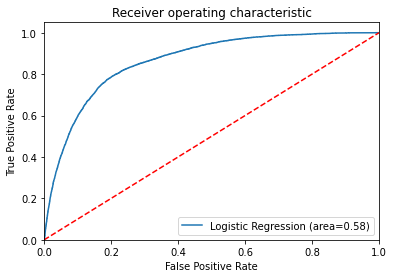

In [68]:
fpr, tpr, thresholds = roc_curve(y,proba[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1],'r--')     # 'r--' : red coloured dash line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
fpr

array([0.00000000e+00, 2.50488452e-05, 2.50488452e-05, ...,
       9.88452482e-01, 9.88452482e-01, 1.00000000e+00])

In [70]:
tpr

array([0.00000000e+00, 0.00000000e+00, 1.89071658e-04, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])

In [71]:
model1 = LogisticRegression(solver='saga', C=20.0, random_state=1)
model1.fit(scaled_x, y)

LogisticRegression(C=20.0, random_state=1, solver='saga')

In [72]:
new_prob = model1.predict_proba(scaled_x)
new_prob

array([[0.97466396, 0.02533604],
       [0.98294935, 0.01705065],
       [0.99446154, 0.00553846],
       ...,
       [0.1096837 , 0.8903163 ],
       [0.82672132, 0.17327868],
       [0.52685741, 0.47314259]])

In [73]:
y_pred3 = model1.predict(scaled_x)
y_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [74]:
model1.score(scaled_x, y)

0.8908451483046161

In [75]:
cr = classification_report(y,y_pred3)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [76]:
roc_score1 = roc_auc_score(y, y_pred3)
roc_score1

0.5938260786450008

Here, we got an improved model just by setting up parameters for LogisticRegression() model.

We can see an improved score of 0.890845 and improved roc_score of 0.593826 as compared to classifier 2.


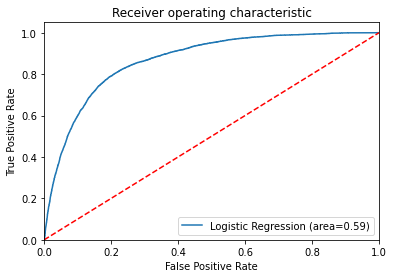

In [77]:
fpr, tpr, thresholds = roc_curve(y,new_prob[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [78]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.93437203e-01, 9.93437203e-01, 1.00000000e+00])

In [79]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [80]:
data_x.shape

(45211, 10)

In [81]:
y.shape

(45211,)

In [82]:
x3 = data_x.values
y3 = y.values

In [83]:
# Splitting the data for training and testing

xtrain, xtest, ytrain, ytest = train_test_split(
        x3, y3, test_size = 0.20, random_state = 10)

# standardizing 'xtrain' and 'xtest'¶


In [84]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain) 

xtest = sc_x.transform(xtest)

In [85]:
print(xtrain[0:5,:])

[[-0.30738733 -0.45356646 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326  1.42538934 -0.43702462  0.62689417]
 [-0.29571388  0.01207209 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326 -1.01971428  2.28820062 -0.93643115]
 [-0.92218909 -0.40758954 -0.41189017 -0.24419181  1.51764318  2.34210565
   0.89399326 -1.01971428  2.28820062 -0.21489639]
 [ 0.43193125 -0.35900401 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [-0.33073423  2.16809592 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326 -1.01971428 -0.43702462 -0.33515218]]


In [88]:
print(xtest[0:5,:])

[[ 0.41636665 -0.45356646 -0.41189017 -0.24419181  1.51764318  0.39881633
   0.89399326  1.42538934 -0.43702462  0.50663838]
 [-0.73930502  0.13989443 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [ 2.52147902  0.28108595 -0.41189017 -0.24419181  1.51764318 -0.24894678
   0.89399326 -0.10280042 -0.43702462  0.26612679]
 [-0.25291122  1.97538417 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326  1.42538934 -0.43702462 -1.05668694]
 [ 0.69652948 -0.43432789 -0.41189017 -0.24419181  1.51764318 -0.24894678
  -1.11857666 -0.71407633 -0.43702462 -0.33515218]]


# Model Building


In [89]:
classifier3 = LogisticRegression(C = 10, random_state = 10, solver = 'lbfgs', n_jobs = 10)
classifier3.fit(xtrain, ytrain)

LogisticRegression(C=10, n_jobs=10, random_state=10)

In [90]:
y_pred4 = classifier3.predict(xtest)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [91]:
# Printing Confusion Matrix

conf_matrix3 = confusion_matrix(ytest,y_pred4)
conf_matrix3

array([[7851,  143],
       [ 836,  213]], dtype=int64)

In [92]:
# probability prediction for target variable
y_prob3 = classifier3.predict_proba(xtest)
y_prob3

array([[0.97617463, 0.02382537],
       [0.98889506, 0.01110494],
       [0.787309  , 0.212691  ],
       ...,
       [0.95289641, 0.04710359],
       [0.96570544, 0.03429456],
       [0.85684936, 0.14315064]])

# Model Validation


In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred4)

0.8917394669910428

In [94]:
roc_score3 = roc_auc_score(ytest, y_pred4)
roc_score3

0.5925810539983157

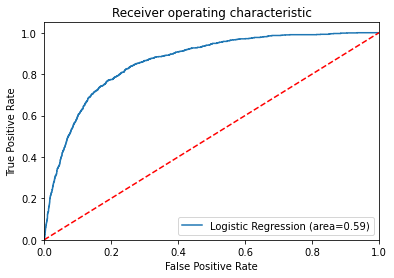

In [95]:
fpr, tpr, thresholds = roc_curve(ytest,y_prob3[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [96]:
cr3 = classification_report(ytest,y_pred4)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [97]:
fpr[:5,]

array([0.        , 0.00012509, 0.00012509, 0.00025019, 0.00025019])

In [98]:
tpr[:5,]


array([0.        , 0.        , 0.00381316, 0.00381316, 0.00571973])